# Versuch 11
## Joule-Thomson-Effekt
Zu Beginn der Auswertung müssen die für die Auswertung üblichen Bibliotheken importiert werden. Welche Module könntet ihr wie üblich für die Auswertung brauchen? 

Falls euch nachträglich Module einfallen, könnt ihr diese jederzeit hier ergänzen. Achtet dabei aber darauf, den entsprechenden Code dann auch erneut auszuführen!


In [1]:
from Hilfsdateien.importe_Bibliotheken import *

Außerdem könnten einige Naturkonstanten später in der Auswertung hilfreich sein. Diese können wir aus <code>scipy.constants</code> importieren. Hilfreich kann außerdem sein, weitere Konstanten wie den Studentschen $t$-Wert zu Beginn zu definieren.

In [2]:
from Hilfsdateien.importe_Konstanten import *

dT_obs = 5.0e-4 #K, halbe Skaleneinheit im Datensatz
dp_obs = 5.0e-4 #bar, halbe Skaleneinheit im Datensatz

epsilon_n2  = 95.05 # K/k_B
epsilon_co2 = 189.0 # K/k_B
sigma_n2  = 3.698 #Å
sigma_co2 = 4.486 #Å

## Erster Auswertungsschritt
Wie üblich wollen wir zunächst unsere Messwerte einlesen. Welcher Befehl generiert Arrays aus z.B. txt oder csv-Dateien? Außerdem sollten beim Einlesen etwaige Kopfzeilen übersprungen werden.

Idealerweise erstellen wir zwei Arrays, welche die Messungen der beiden Gase enthalten. Da wir $n$ Messreihen mit $k$ Messwerten und $j$ Messgrößen haben, muss für jedes Gas ein entsprechendes 3D-Array erstellt werden.
_Für Fortgeschrittene_: Eine syntaxsparende Methode ist das Erstellen der Arrays mit Hilfe einer List-Comprehension

In [3]:
datadir = 'data_v11/'
#Kohlenstoffdioxid
n,k,j=3,17,2
co2 = np.empty((n,k,j))
n2  = np.empty((n,k,j))
co2_messungen = np.array(['CO2_0.2øC.txt','CO2_22.9øC.txt','CO2_50.6øC.txt'])
n2_messungen = np.array(['N2_0.2øC.txt','N2_22.9øC.txt','N2_50.6øC.txt'])
for i in range(n):
    co2[i] = np.genfromtxt(datadir+co2_messungen[i],skip_header=2)
    n2[i] = np.genfromtxt(datadir+n2_messungen[i],skip_header=2)

Anhand einer linearen Regression soll nun aus der Steigung der Joule-Thomson-Koeffizient ermittelt werden. Hierzu können sowohl <code>curve_fit</code> als auch <code>linregress</code> verwendet werden. Nach der im Skript gegebenen Gleichung
\begin{align}
    \mu_\mathrm{JT} = \left(\frac{\partial T}{\partial p}\right)_{H}
\end{align}
wird der Joule-Thomson-Koeffizient $\mu_\mathrm{JT}$ definiert
    
Bedenkt bei den Unsicherheiten, dass der Studentsche $t$-Faktor über $N-2$ Freiheitsgrade mit einbezogen werden muss. Außerdem ist es hilfreich für spätere Auftragungen, auch den Ordinatenschnittpunkt mitzuübergeben. Damit wir später auf die Ergebnisse noch zugreifen können und uns die Werte nicht manuell notieren müssen, übergeben wir sie am besten in ein neues Array.

In [4]:
#Erstmal werden leere Arrays in der Größe des erwarteten Array erstellt.
mu_co2_linreg = np.empty([n,3])
mu_n2_linreg = np.empty([n,3])
#Wir wollen wieder ein Array mit den Koeffizienten bei allen Bedingungen haben
for i in range(n):
    co2_linreg = linregress(co2[i])
    n2_linreg  = linregress(n2[i])
    mu_co2_linreg[i] = np.array([co2_linreg.slope,co2_linreg.stderr*student_faktor[0],co2_linreg.intercept])
    mu_n2_linreg[i]  = np.array([n2_linreg.slope,n2_linreg.stderr*student_faktor[0],n2_linreg.intercept])


Die erhaltene Ausgleichsgerade wollen wir nun inklusive der Messwerte mit Unsicherheiten plotten. Welche Befehle werden hierfür genutzt?

In unserem Fall bietet es sich an, eine große Auftragung mit je einer Unterauftragung pro Messbedingung zu nutzen. Eine effiziente Lösung ist, mit Hilfe einer <code>for</code>-Schleife die einzelnen Unterauftragungen iterativ zu erstellen.

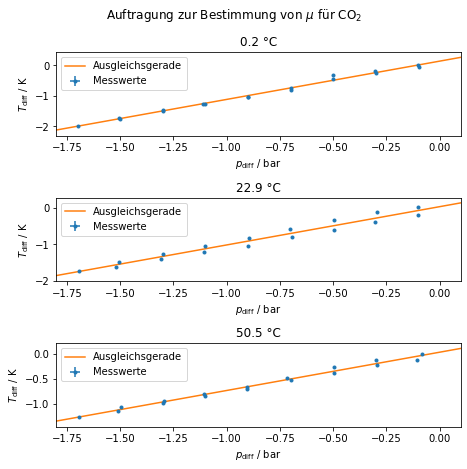

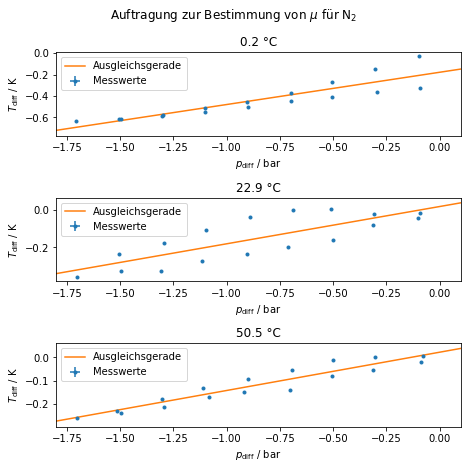

In [5]:
fig, ax = plt.subplots(nrows=3,figsize=(6.6,6.6)) #Größenagaben in Inches
title_arr = ["0.2 °C","22.9 °C", "50.5 °C"]
for i in range(len(co2)):
    ax[i].errorbar(co2[i,:,0],co2[i,:,1],xerr=dp_obs,yerr=dT_obs,marker='o',markersize=3,ls='None',label="Messwerte")
    x_range = np.arange(-1.85,0.15,0.01) #anzupassen je Messwerte
    ax[i].set_xlim(-1.8,0.1)
    ax[i].plot(x_range,mu_co2_linreg[i,2]+mu_co2_linreg[i,0]*x_range,label="Ausgleichsgerade")
    ax[i].set_xlabel("$p_\mathrm{diff}$ / bar")
    ax[i].set_ylabel("$T_\mathrm{diff}$ / K")
    ax[i].set_title(title_arr[i])
    ax[i].legend()
fig.suptitle("Auftragung zur Bestimmung von $\mu$ für CO$_{2}$")    
plt.tight_layout()
plt.show()
plt.close()

fig, ax = plt.subplots(nrows=3,figsize=(6.6,6.6)) #Größenagaben in Inches
title_arr = ["0.2 °C","22.9 °C", "50.5 °C"]
for i in range(len(n2)):
    ax[i].errorbar(n2[i,:,0],n2[i,:,1],xerr=dp_obs,yerr=dT_obs,marker='o',markersize=3,ls='None',label="Messwerte")
    x_range = np.arange(-1.85,0.15,0.01) #anzupassen je Messwerte
    ax[i].set_xlim(-1.8,0.1)
    ax[i].plot(x_range,mu_n2_linreg[i,2]+mu_n2_linreg[i,0]*x_range,label="Ausgleichsgerade")
    ax[i].set_xlabel("$p_\mathrm{diff}$ / bar")
    ax[i].set_ylabel("$T_\mathrm{diff}$ / K")
    ax[i].set_title(title_arr[i])
    ax[i].legend()
fig.suptitle("Auftragung zur Bestimmung von $\mu$ für N$_{2}$")    
plt.tight_layout()
plt.show()
plt.close()


## Zweiter Auswertungsschritt
Für den Virialkoeffizientenansatz brauchen wir die isobare Wärmekapazität $C_\mathrm{p}$, sodass wir diesen Auswertungsschritt vorziehen. Im Skript ist die Gleichung
\begin{align}
C_\mathrm{V}^{\mathrm{vib}} = R\cdot\left(\frac{h\cdot\nu}{k_{\mathrm{B}}\cdot T}\right)^2  \cdot \dfrac{\exp\left(\frac{h\cdot\nu}{k_{\mathrm{B}}\cdot T}\right)}{\left(\left(\frac{h\cdot\nu}{k_{\mathrm{B}}\cdot T}\right)-1\right)^2}
\end{align}
gegeben, welche ihr in eurem Protokoll herzuleiten habt.

Die entsprechenden Größen können wir nun entweder entweder manuell definieren oder besser das Modul <code>sympy</code> nutzen. Hierzu müssen zu Beginn einige Variablen als „Symbole“ einer Funktion $f(a,b,c,\dots)$ definiert werden. SymPy ermöglicht es uns, bspw. automatisch Ableitungen von dieser Funktion zu bestimmen. Für Details sei auf die Dokumentation verwiesen.

Beachtet, dass die Deformationsschwingungen zweifach entartet ist.

In [6]:
hPlanck,nu,kB,T,dT, Cvv = symbols('h ν k T dT Cvvib')
z_vib = exp(-hPlanck*nu/(2*kB*T))/(1-exp(-hPlanck*nu/(kB*T)))
#print("------------------------------")
#pprint(factor(hPlanck*nu/(2*kB*T**2) + hPlanck*nu/(kB*T**2*(exp(hPlanck*nu/(kB*T))-1))))
U_vib = R*T**2 * diff(log(z_vib),T)
C_v_vib  = diff(U_vib,T)

#pprint(factor(C_v_vib))
#pprint(factor((hPlanck*nu/(kB*T))**2*R*exp(hPlanck*nu/(kB*T))/(-1 + exp(hPlanck*nu/(kB*T)))**2))
dC_v_vib = sqrt((diff(C_v_vib,T)*dT)**2)
C_v_vib = lambdify([hPlanck,nu,kB,T],C_v_vib,'numpy')
dC_v_vib = lambdify([hPlanck,nu,kB,T,dT],dC_v_vib,'numpy')
#expand(c_v)
n2_omega = np.array([2357.55])*100 #cm^{-1} * 100 = m^{-1}
co2_omega = np.array([1342.86,667.30,667.30,2349.30])*100 #2,3 ist zweifach entartet
#temp = np.array([0.2,22.9,50.6])+273.15
temp = np.array([275,293,321])

C_v_vib_n2   = np.empty(3)
dC_v_vib_n2  = np.empty(3)
C_v_vib_co2  = np.empty(3)
dC_v_vib_co2 = np.empty(3)
for j,i in enumerate(temp):
    C_v_vib_n2[j]   = np.sum(C_v_vib(h,n2_omega*c_0,k_B,i))
    dC_v_vib_n2[j]  = np.sum(dC_v_vib(h,n2_omega*c_0,k_B,i,0.5))
    C_v_vib_co2[j]  = np.sum(C_v_vib(h,co2_omega*c_0,k_B,i))
    dC_v_vib_co2[j] = np.sum(dC_v_vib(h,co2_omega*c_0,k_B,i,0.5))

C_p_n2 = 3/2*R + R + C_v_vib_n2  + R
C_p_co2 =3/2*R + R + C_v_vib_co2 + R
print("Stickstoff")
print(C_p_n2)
print("Kohlenstoffdioxid")
print(C_p_co2)

Stickstoff
[29.106 29.111 29.125]
Kohlenstoffdioxid
[36.04  36.887 38.147]


## Dritter Auswertungsschritt
Das molare Volumen $V_\mathrm{m}$ hängt mit einem Virialkoeffizienten $B$ nach der Gleichung
\begin{align}
V_\mathrm{m} = \frac{R\cdot T}{p} + B(T)
\end{align}
zusammen.
Im letzten Auswertungsschritt wollen wir nun aus dem Virialkoeffizienten $B$ nach der im Skript gegebenen Gleichung
\begin{align}
B(T) &= \tfrac{2}{3}\cdot\pi\cdot N_\mathrm{A}\cdot\sigma^{3}\cdot B^{*}(T^{*})
\end{align}
mit 
\begin{align}
T^{*} = \frac{k_\mathrm{B}\cdot T}{\epsilon}
\end{align}
den Joule-Thomson-Koeffizienten bestimmen. In dieser bezeichnet $N_\mathrm{A}$ die Avogadrokonstante, $\sigma$ den Schnittpunkt des Lennard-Jones-Potentials mit der Abszisse und $\epsilon$ die Potentialtiefe. Zunächst sollten wir an Python die für unsere Ergebnisse passenden Tabellenwerte für $B^{*}$ und dessen Ableitung in jeweils getrennten Arrays angeben

In [7]:
T_star_n2 = temp/epsilon_n2 #k_B entfällt
T_star_co2 = temp/epsilon_co2
#B_star ist Tabelle zu entnehmen
#Werte sind für Datensatz passende Werte
print(T_star_co2)
B_star_n2 = np.array([-0.14850215,-0.08441245,-0.00428086])
diff_B_star_n2 = np.array([1.0029572,0.9202229,0.7867145])
B_star_co2 = np.array([-1.2008832,-1.1235183,-0.92361639])
diff_B_star_co2 = np.array([2.4141403,2.3056683,2.0292621])
#Frage mal nach, ob man nicht lieber direkt B*-Funktion angibt

[1.455 1.55  1.698]


Nun liegen alle Größen vor, um $\mu_\mathrm{JT}$ nach der Gleichung
\begin{align}
\mu_\mathrm{JT} = \frac{1}{C_\mathrm{p}}\left(T\cdot\left(\frac{\partial V_\mathrm{m}}{\partial T}\right)_p -V_\mathrm{m}\right)
\end{align}
zu bestimmen. Diese solltet ihr vor dem Rechnen mit Python durch sinnvolles Substituieren in eine geeignetere Form überführen!
***
Gefordert ist
\begin{align}
\mu_\mathrm{JT} = \frac{2}{3}\cdot\frac{\pi\cdot N_\mathrm{A}\cdot \sigma^{3}}{C_p}\cdot\left(T^*\cdot\frac{\partial B^*}{\partial T^*}-B^*\right)
\end{align}

In [17]:
mu_jt_theo_n2 = 2/3*np.pi*N_A*sigma_n2**3 / C_p_n2 * (diff_B_star_n2 - B_star_n2)
mu_jt_theo_co2 = 2/3*np.pi*N_A*sigma_co2**3 / C_p_co2 * (diff_B_star_co2 - B_star_co2)
print("Temperatur / K")
print(temp)
print("Stickstoff")
print(mu_jt_theo_n2)
print("Kohlenstoffdioxid")
print(mu_jt_theo_co2)

Temperatur / K
[275 293 321]
Stickstoff
[2.523e+24 2.201e+24 1.732e+24]
Kohlenstoffdioxid
[1.142e+25 1.059e+25 8.814e+24]
